### CosMX RNA Annot Cluster Data Analysis

This is an exploration of the CosMX RNA data

Goals
* Load and view the RNA data
* Under the cellular notation

In [17]:
import scanpy as sc
import squidpy as sq
import pandas as pd
import numpy as np

# Load files
expr = pd.read_csv(r"C:\Users\evanj\OneDrive\Documents\Shapiro Data Files\CutdownRNAData\RNAexpression_Transpose-TMA-A Only.csv", index_col=0)
metadata = pd.read_csv(r"C:\Users\evanj\OneDrive\Documents\Shapiro Data Files\CutdownRNAData\RNAmetadata-TMA-A Only.csv", index_col=0)
umap = pd.read_csv(r"C:\Users\evanj\OneDrive\Documents\Shapiro Data Files\CutdownRNAData\RNAumap-TMA-A Only.csv", index_col=0)

# Display General Data on the imported data. Run the import first
# display(expr.head(5))
# display(metadata.head(5))
# display(umap.head(5))
display(expr.columns)
display(expr.index)

# # Create AnnData object
adata = sc.AnnData(X=expr.values)

# # Assign metadata
adata.obs = metadata
adata.var_names = expr.columns
adata.obs_names = expr.index

# Add spatial coordinates and UMAP to .obsm
adata.obsm["spatial"] = metadata[['x_cent', 'y_cent']].values  # adjust if needed
adata.obsm["X_umap"] = umap.values

Index(['ABL1', 'ABL2', 'ACE', 'ACE2', 'ACKR1', 'ACKR3', 'ACKR4', 'ACTA2',
       'ACTG2', 'ACVR1',
       ...
       'NegPrb13', 'NegPrb14', 'NegPrb15', 'NegPrb16', 'NegPrb18', 'NegPrb19',
       'NegPrb20', 'NegPrb21', 'NegPrb22', 'NegPrb23'],
      dtype='object', length=978)

Index(['__Run5607.TMAA_1_1', '__Run5607.TMAA_2_1', '__Run5607.TMAA_3_1',
       '__Run5607.TMAA_4_1', '__Run5607.TMAA_5_1', '__Run5607.TMAA_6_1',
       '__Run5607.TMAA_7_1', '__Run5607.TMAA_8_1', '__Run5607.TMAA_9_1',
       '__Run5607.TMAA_10_1',
       ...
       '__Run5607.TMAA_3593_25', '__Run5607.TMAA_3594_25',
       '__Run5607.TMAA_3595_25', '__Run5607.TMAA_3597_25',
       '__Run5607.TMAA_3599_25', '__Run5607.TMAA_3600_25',
       '__Run5607.TMAA_3601_25', '__Run5607.TMAA_3602_25',
       '__Run5607.TMAA_3603_25', '__Run5607.TMAA_3604_25'],
      dtype='object', name='cell_ID', length=85390)

In [1]:
# Cell to transpose the CSV exrp data into a new files

import scanpy as sc
import squidpy as sq
import pandas as pd
import numpy as np


import os
print(os.getcwd())

# Load files
expr_orig = pd.read_csv(r"C:\Users\evanj\OneDrive\Documents\RNAexpression.csv", index_col=0)
expr=expr_orig.transpose()
expr.to_csv("RNAexpression_Transpose.csv", index=False)

C:\Users\evanj\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
C:\Users\evanj\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
C:\Users\evanj\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,
C:\Users\evanj\anaconda3\Lib\site-packages\anndata\utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning

In [15]:
# Cell of analysis of the outputs of the cell above

display(metadata.tail(5))

# View Spatial Data
# Access and print spatial data
if 'spatial' in adata.obsm:
    print("Spatial coordinates (first 5 rows):")
    print(adata.obsm['spatial'][:5])
else:
    print("'spatial' key not found in adata.obsm")

orig.ident  nCount_RNA  nFeature_RNA  nCount_SCT  \
cell_ID                                                                     
__Run5607.TMAA_3600_25  TMA_A_FOV25          24            19         101   
__Run5607.TMAA_3601_25  TMA_A_FOV25          24            19          93   
__Run5607.TMAA_3602_25  TMA_A_FOV25          51            35         122   
__Run5607.TMAA_3603_25  TMA_A_FOV25          35            24         117   
__Run5607.TMAA_3604_25  TMA_A_FOV25          48            31         125   

                        nFeature_SCT      predicted.id  prediction.score.CD8  \
cell_ID                                                                        
__Run5607.TMAA_3600_25            32            Plasma              0.042639   
__Run5607.TMAA_3601_25            32               CD4              0.031901   
__Run5607.TMAA_3602_25            37               CD4              0.096631   
__Run5607.TMAA_3603_25            30  Epithelial cells              0.000000   
__Run5607.TMAA_3604_25            34  Epithelial cells              0.000000   

                        prediction.score.CD4  prediction.score.Plasma  \
cell_ID                                                                 
__Run5607.TMAA_3600_25              0.016004                 0.086955   
__Run5607.TMAA_3601_25              0.097762                 0.040860   
__Run5607.TMAA_3602_25              0.220655                 0.027530   
__Run5607.TMAA_3603_25              0.004094                 0.000000   
__Run5607.TMAA_3604_25              0.000000                 0.000000   

                        prediction.score.NK  ...  annot_cluster2  NhCoord10  \
cell_ID                                      ...                              
__Run5607.TMAA_3600_25              0.01055  ...          Bcells          1   
__Run5607.TMAA_3601_25              0.00000  ...          Bcells          1   
__Run5607.TMAA_3602_25              0.00000  ...   Tumors_Others          1   
__Run5607.TMAA_3603_25              0.00000  ...   Tumors_KRT17+          3   
__Run5607.TMAA_3604_25              0.00000  ...   Tumors_KRT17+          7   

                        NhCoord12  NhCoord15  NhCoord20  NhCoord6  NhCoord8  \
cell_ID                                                                       
__Run5607.TMAA_3600_25          1          5          5         3         7   
__Run5607.TMAA_3601_25          4          4          4         3         1   
__Run5607.TMAA_3602_25          4          9          4         3         1   
__Run5607.TMAA_3603_25          8          3          3         1         2   
__Run5607.TMAA_3604_25          2         11         11         2         2   

                                 NhCoord20_anno  k10_NhCoord20  \
cell_ID                                                          
__Run5607.TMAA_3600_25       Fibroblast_Centric             16   
__Run5607.TMAA_3601_25  Fibroblast_Immune_Mixed             10   
__Run5607.TMAA_3602_25  Fibroblast_Immune_Mixed             10   
__Run5607.TMAA_3603_25        Tumor_Epi_Centric              4   
__Run5607.TMAA_3604_25        Tumor_Epi_Centric             13   

                        k10_NhCoord20_anno  
cell_ID                                     
__Run5607.TMAA_3600_25                CAFs  
__Run5607.TMAA_3601_25    CAF_Immune_Mixed  
__Run5607.TMAA_3602_25    CAF_Immune_Mixed  
__Run5607.TMAA_3603_25          Tumor_High  
__Run5607.TMAA_3604_25          Tumor_High  

[5 rows x 53 columns]

Spatial coordinates (first 5 rows):
[[0.23319136 0.99697821]
 [0.62413351 0.99683615]
 [0.84565431 0.99728546]
 [0.39671849 0.99807504]
 [0.69936663 0.99870825]]


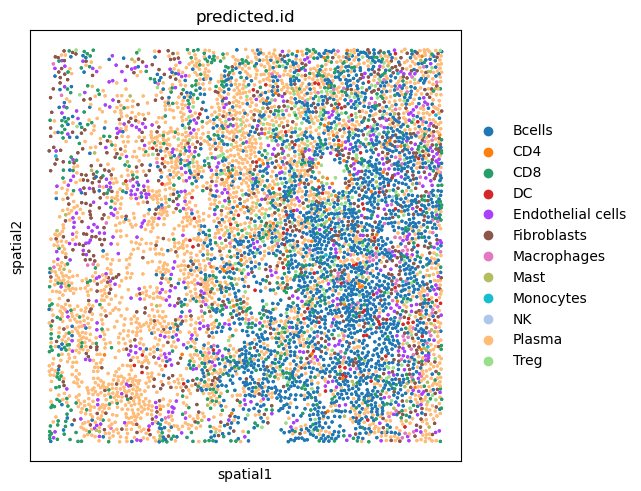

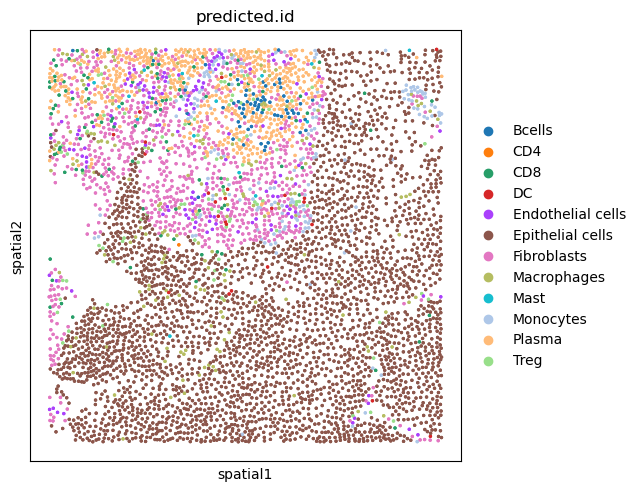

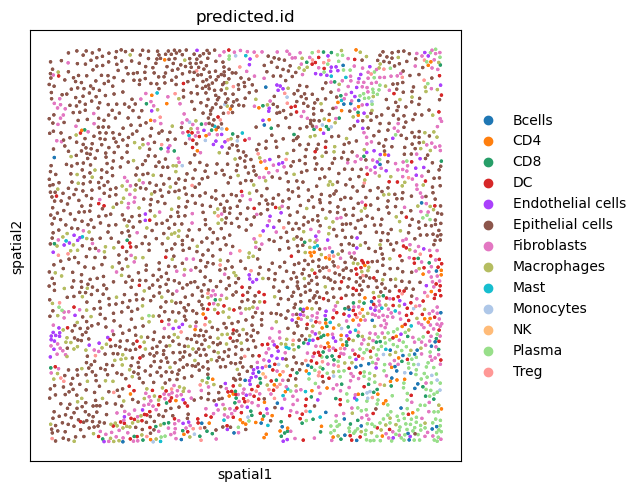

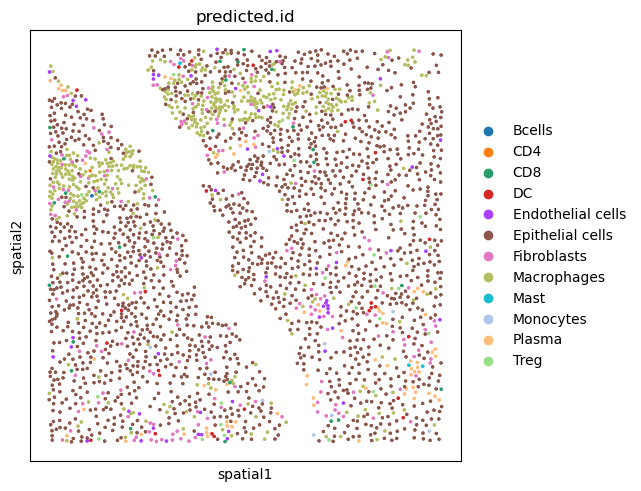

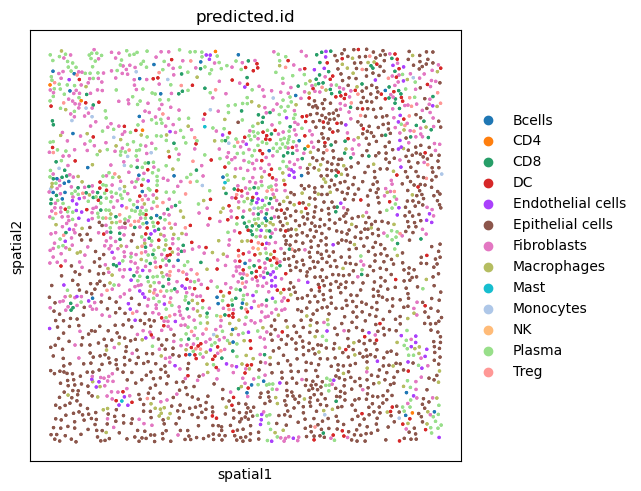

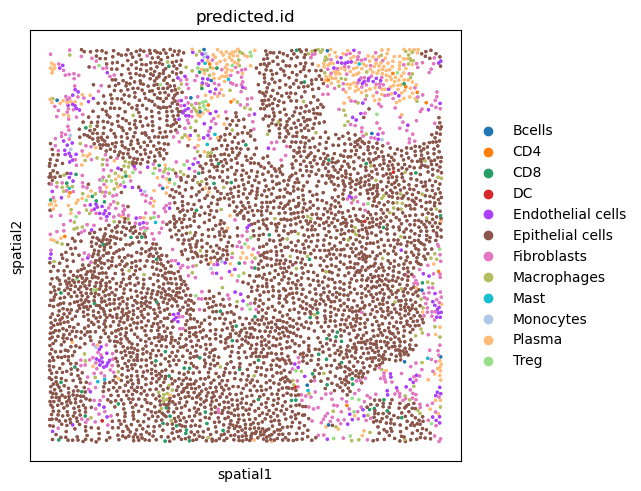

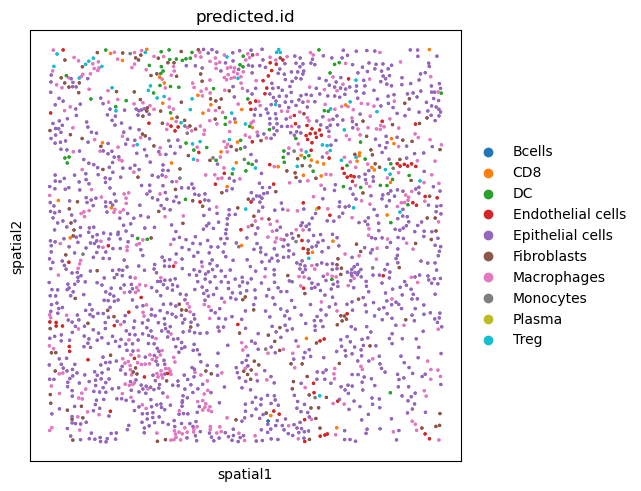

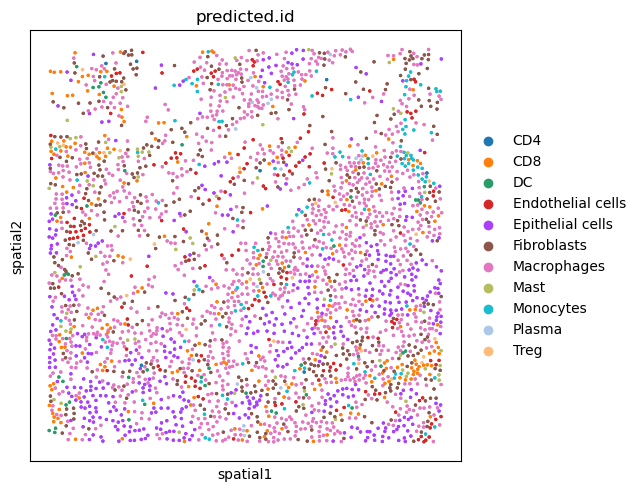

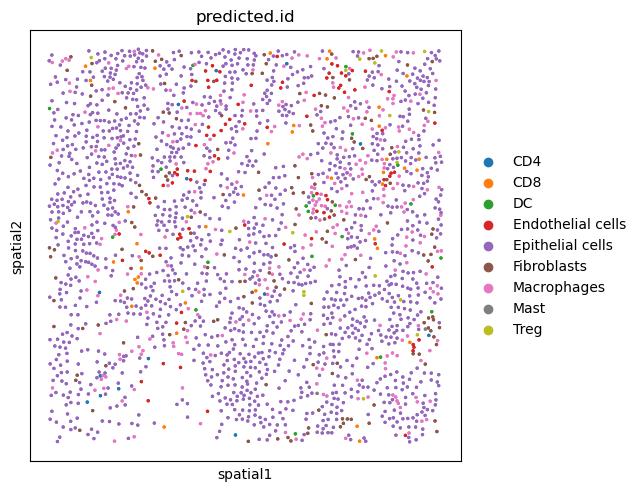

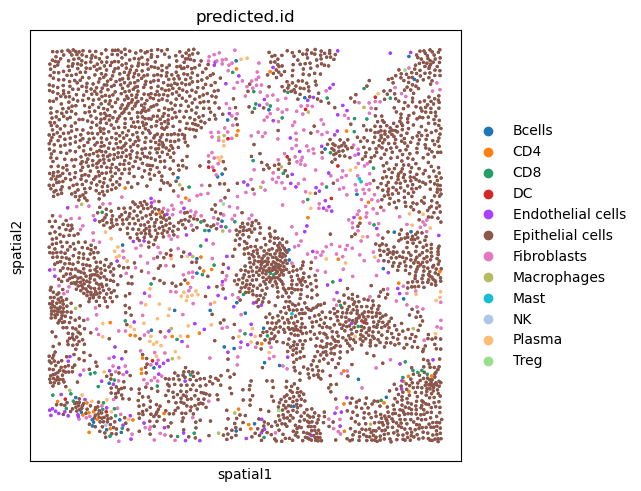

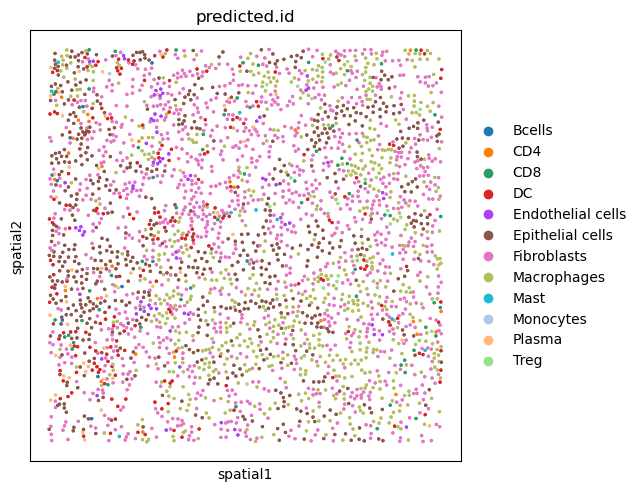

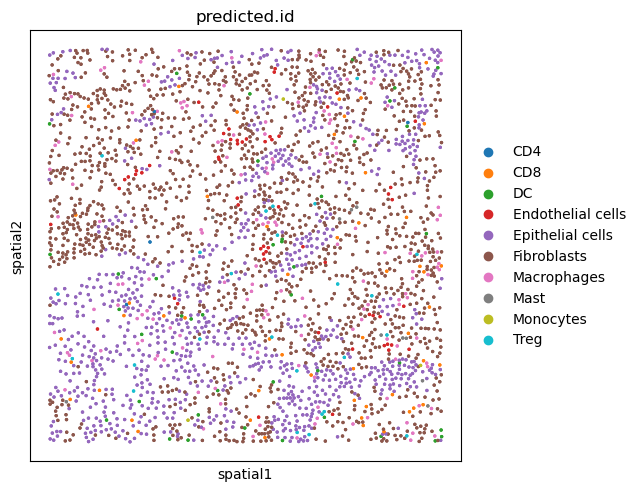

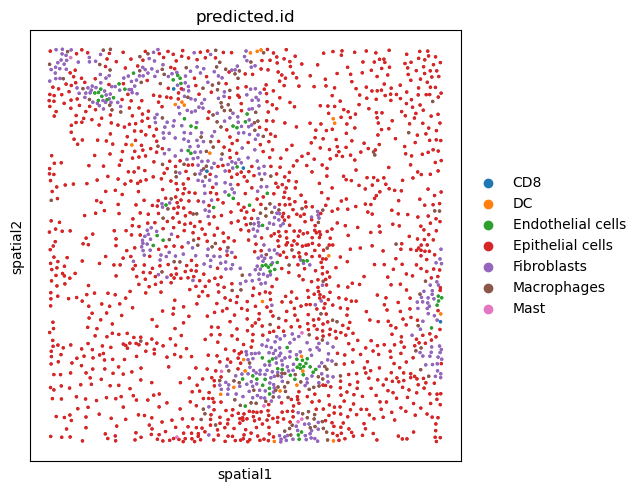

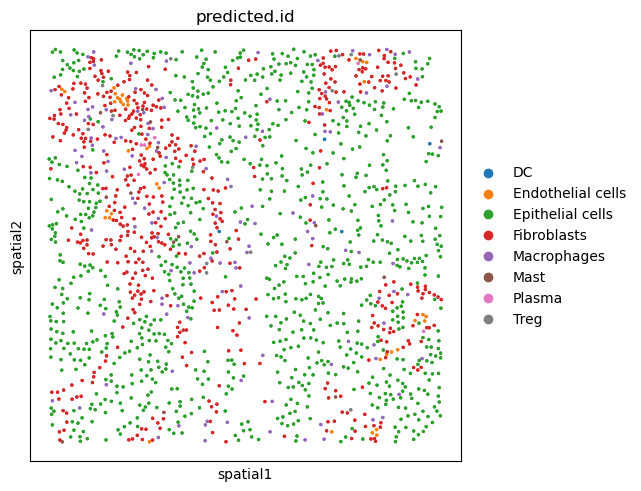

In [22]:
import squidpy as sq
import warnings
warnings.filterwarnings("ignore")
sq.pl.spatial_scatter(
    adata[adata.obs.cell_ID.str.contains("TMAA_.+?_1(?!\d)")], shape=None, color="predicted.id", size=8
)

sq.pl.spatial_scatter(
    adata[adata.obs.cell_ID.str.contains("TMAA_.+?_2(?!\d)")], shape=None, color="predicted.id", size=8
)
sq.pl.spatial_scatter(
    adata[adata.obs.cell_ID.str.contains("TMAA_.+?_3(?!\d)")], shape=None, color="predicted.id", size=8
)

sq.pl.spatial_scatter(
    adata[adata.obs.cell_ID.str.contains("TMAA_.+?_4(?!\d)")], shape=None, color="predicted.id", size=8
)
sq.pl.spatial_scatter(
    adata[adata.obs.cell_ID.str.contains("TMAA_.+?_5(?!\d)")], shape=None, color="predicted.id", size=8
)

sq.pl.spatial_scatter(
    adata[adata.obs.cell_ID.str.contains("TMAA_.+?_6(?!\d)")], shape=None, color="predicted.id", size=8
)
sq.pl.spatial_scatter(
    adata[adata.obs.cell_ID.str.contains("TMAA_.+?_7(?!\d)")], shape=None, color="predicted.id", size=8
)

sq.pl.spatial_scatter(
    adata[adata.obs.cell_ID.str.contains("TMAA_.+?_8(?!\d)")], shape=None, color="predicted.id", size=8
)
sq.pl.spatial_scatter(
    adata[adata.obs.cell_ID.str.contains("TMAA_.+?_9(?!\d)")], shape=None, color="predicted.id", size=8
)

sq.pl.spatial_scatter(
    adata[adata.obs.cell_ID.str.contains("TMAA_.+?_10(?!\d)")], shape=None, color="predicted.id", size=8
)
sq.pl.spatial_scatter(
    adata[adata.obs.cell_ID.str.contains("TMAA_.+?_11(?!\d)")], shape=None, color="predicted.id", size=8
)

sq.pl.spatial_scatter(
    adata[adata.obs.cell_ID.str.contains("TMAA_.+?_12(?!\d)")], shape=None, color="predicted.id", size=8
)
sq.pl.spatial_scatter(
    adata[adata.obs.cell_ID.str.contains("TMAA_.+?_13(?!\d)")], shape=None, color="predicted.id", size=8
)

sq.pl.spatial_scatter(
    adata[adata.obs.cell_ID.str.contains("TMAA_.+?_14(?!\d)")], shape=None, color="predicted.id", size=8
)

  0%|          | 0/1000 [00:00<?, ?/s]

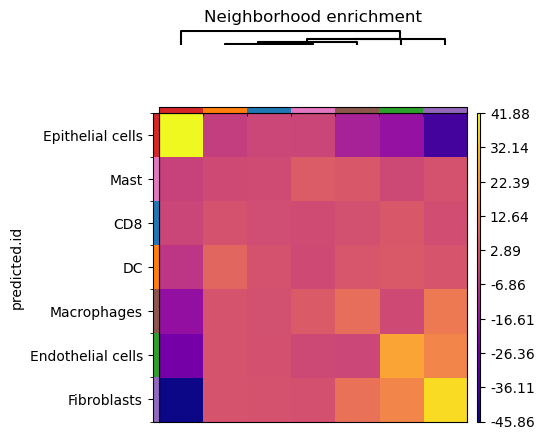

In [30]:
import numpy as np

# Makes subset of the adata object
adata_sub = adata[adata.obs.cell_ID.str.contains("TMAA_.+?_13(?!\d)")].copy()

# Ensure 'cell type' is categorical 
adata_sub.obs['predicted.id'] = adata_sub.obs['predicted.id'].astype('category')

for key in ['spatial_connectivities', 'spatial_distances']:
    if key in adata_sub.obsp:
        del adata_sub.obsp[key]

if 'spatial' in adata_sub.uns:
    del adata_sub.uns['spatial']
finite_mask = np.isfinite(adata_sub.obsm['spatial']).all(axis=1)
adata_sub = adata_sub[finite_mask].copy()

# Compute spatial neighbors on the subset
sq.gr.spatial_neighbors(adata_sub, coord_type="generic", spatial_key="spatial")

# Run neighborhood enrichment on the subset
sq.gr.nhood_enrichment(adata_sub, cluster_key="predicted.id")

# Plot neighborhood enrichment results from the subset
sq.pl.nhood_enrichment(
    adata_sub, 
    cluster_key="predicted.id", 
    method="single", 
    cmap="plasma", 
)                                                              